# Data Wrangling

## Data set

1. Box Office Mojo
2. The Movie DB
3. The Numbers
4. IMDB

## Import relevant libraries:

In [155]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import sqlite3
import seaborn as sns
%matplotlib inline

## 1. Box Office Mojo dataset

Open the bom_movie

In [157]:
# Open bom_movie dataframe:
bom_movie = pd.read_csv('zippedData/bom.movie_gross.csv')
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [158]:
#Create a new column from mapping title & year:
bom_movie['title_year'] = bom_movie.title + bom_movie['year'].astype(str)
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 32010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010)2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 12010
3,Inception,WB,292600000.0,535700000,2010,Inception2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After2010


## 2. The Movie DB dataset

In [215]:
# Open tmdb_movie dataframe:
tmdb_movie = pd.read_csv('zippedData/tmdb.movies.csv')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [217]:
tmdb_movie.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [218]:
#Get 'release_month' & 'release_year' from column 'release_date':
tmdb_movie['release_month'] = tmdb_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tmdb_movie['release_year'] = tmdb_movie['release_date'].map(lambda x: x[:4])
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010


In [221]:
# Create a new column from mapping title & year:
tmdb_movie['title_year'] = tmdb_movie['title'] + tmdb_movie['release_year'].astype(str)
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,release_year,title_year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,2010,Harry Potter and the Deathly Hallows: Part 12010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,2010,How to Train Your Dragon2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,2010,Iron Man 22010
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,1995,Toy Story1995
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,2010,Inception2010


In [222]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  release_month      26517 non-null  int64  
 11  release_year       26517 non-null  object 
 12  title_year         26517 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.6+ MB


## 3. The Numbers dataset

In [163]:
#Open tn_movie dataframe:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [164]:
# Get 'release_month' & 'release_year' from release_date and create new columns:
tn_movie['release_month'] = tn_movie['release_date'].map(lambda x: pd.to_datetime(x).month)
tn_movie['release_year'] = tn_movie['release_date'].map(lambda x: x[-4:])
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12,2017


In [165]:
# Create a new column from mapping 2 columns 'movie' & 'release_year':
tn_movie['movie_year'] = tn_movie['movie'] + tn_movie['release_year'].astype(str)

In [166]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2009,Avatar2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5,2011,Pirates of the Caribbean: On Stranger Tides2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6,2019,Dark Phoenix2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5,2015,Avengers: Age of Ultron2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12,2017,Star Wars Ep. VIII: The Last Jedi2017


In [167]:
tn_movie.shape

(5782, 9)

In [169]:
# Turn production_budget value in numeric values:
tn_movie["production_budget"] = [str(i).replace("$", "") for i in tn_movie["production_budget"]]
tn_movie["production_budget"] = [float(str(i).replace(",", "")) for i in tn_movie["production_budget"]]

In [170]:
# Turn domestic_gross value in numeric values:
tn_movie["domestic_gross"] = [str(i).replace("$", "") for i in tn_movie["domestic_gross"]]
tn_movie["domestic_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["domestic_gross"]]


In [171]:
# Turn worldwide_gross value in numeric values:
tn_movie["worldwide_gross"] = [str(i).replace("$", "") for i in tn_movie["worldwide_gross"]]
tn_movie["worldwide_gross"] = [float(str(i).replace(",", "")) for i in tn_movie["worldwide_gross"]]

In [172]:
#Create 7 new columns of gross revenue, profit & ROI:
tn_movie['international_gross'] = tn_movie.worldwide_gross - tn_movie.domestic_gross
tn_movie['domestic_profit'] = tn_movie.domestic_gross - tn_movie.production_budget
tn_movie['international_profit'] = tn_movie.international_gross - tn_movie.production_budget
tn_movie['worldwide_profit'] = tn_movie.worldwide_gross - tn_movie.production_budget
tn_movie['domestic_ROI'] = (tn_movie.domestic_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['international_ROI'] = (tn_movie.international_gross - tn_movie.production_budget)/tn_movie.production_budget
tn_movie['worldwide_ROI'] = (tn_movie.worldwide_gross - tn_movie.production_budget)/tn_movie.production_budget

In [174]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,12,2009,Avatar2009,2.015838e+09,335507625.0,1.590838e+09,2.351345e+09,0.789430,3.743147,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,-169536125.0,3.940000e+08,6.350639e+08,-0.412899,0.959571,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,-307237650.0,-2.430000e+08,-2.002376e+08,-0.877822,-0.694286,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,128405868.0,6.134081e+08,1.072414e+09,0.388403,1.855439,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,12,2017,Star Wars Ep. VIII: The Last Jedi2017,6.965404e+08,303181382.0,3.795404e+08,9.997217e+08,0.956408,1.197288,3.153696


In [175]:
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5782 non-null   int64  
 1   release_date          5782 non-null   object 
 2   movie                 5782 non-null   object 
 3   production_budget     5782 non-null   float64
 4   domestic_gross        5782 non-null   float64
 5   worldwide_gross       5782 non-null   float64
 6   release_month         5782 non-null   int64  
 7   release_year          5782 non-null   object 
 8   movie_year            5782 non-null   object 
 9   international_gross   5782 non-null   float64
 10  domestic_profit       5782 non-null   float64
 11  international_profit  5782 non-null   float64
 12  worldwide_profit      5782 non-null   float64
 13  domestic_ROI          5782 non-null   float64
 14  international_ROI     5782 non-null   float64
 15  worldwide_ROI        

## 4. IMDB dataset

In [176]:
con = sqlite3.connect('zippedData/im.db')
cursor_obj = con.cursor()

In [177]:
%%bash 

sqlite3 zippedData/im.db
.tables

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [178]:
#Open movie_basics dataframe:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", con)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### 4.1. Open directors dataframe:

In [179]:
# Create a new column from mapping 'primary_title' & 'year'
movie_basics_df['title_year'] = movie_basics_df['primary_title'] + movie_basics_df['start_year'].astype(str)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera2017


## Merging data

Merge 'tn_movie' dataframe with 'movie_basics' basing on 'movie_year' & 'title_year' 
to link genres with financial metrics:

In [180]:
movie_profit_genre = pd.merge(tn_movie, movie_basics_df, left_on = "movie_year",right_on ="title_year", how = "inner" )
movie_profit_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,domestic_ROI,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,-0.412899,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.877822,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,0.388403,1.855439,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,1.262718,3.564396,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,-0.236586,0.423070,1.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017


In [48]:
movie_profit_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1547 non-null   int64  
 1   release_date          1547 non-null   object 
 2   movie                 1547 non-null   object 
 3   production_budget     1547 non-null   float64
 4   domestic_gross        1547 non-null   float64
 5   worldwide_gross       1547 non-null   float64
 6   release_month         1547 non-null   int64  
 7   release_year          1547 non-null   object 
 8   movie_year            1547 non-null   object 
 9   international_gross   1547 non-null   float64
 10  domestic_profit       1547 non-null   float64
 11  international_profit  1547 non-null   float64
 12  worldwide_profit      1547 non-null   float64
 13  domestic_ROI          1547 non-null   float64
 14  international_ROI     1547 non-null   float64
 15  worldwide_ROI        

In [182]:
#Copy "genres" column and create a new column called "each_genre"
movie_profit_genre.loc[:, 'each_genre'] = movie_profit_genre['genres'].copy()
movie_profit_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,1.855439,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,3.564396,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,0.423070,1.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"


Sort string in "genres" columns in anphabet order:

In [183]:

movie_profit_genre.loc[:, 'genres'] = movie_profit_genre['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))) if x is not None else '')

movie_profit_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1547 non-null   int64  
 1   release_date          1547 non-null   object 
 2   movie                 1547 non-null   object 
 3   production_budget     1547 non-null   float64
 4   domestic_gross        1547 non-null   float64
 5   worldwide_gross       1547 non-null   float64
 6   release_month         1547 non-null   int64  
 7   release_year          1547 non-null   object 
 8   movie_year            1547 non-null   object 
 9   international_gross   1547 non-null   float64
 10  domestic_profit       1547 non-null   float64
 11  international_profit  1547 non-null   float64
 12  worldwide_profit      1547 non-null   float64
 13  domestic_ROI          1547 non-null   float64
 14  international_ROI     1547 non-null   float64
 15  worldwide_ROI        

In [184]:
movie_profit_genre.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_month', 'release_year', 'movie_year',
       'international_gross', 'domestic_profit', 'international_profit',
       'worldwide_profit', 'domestic_ROI', 'international_ROI',
       'worldwide_ROI', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'title_year', 'each_genre'],
      dtype='object')

Split "genres" into single genre, from 1 row into multiple rows:

In [185]:
movie_genres = movie_profit_genre.set_index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'release_month', 'release_year', 'movie_year',
       'international_gross', 'domestic_profit', 'international_profit',
       'worldwide_profit', 'domestic_ROI', 'international_ROI',
       'worldwide_ROI', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'title_year']).apply(lambda x: x.str.split(',').explode()).reset_index()
movie_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Action
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,0.959571,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Fantasy
3,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,107000000.0,...,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Action
4,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,107000000.0,...,-0.694286,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure


Calculate mean of all financial metrics of each genre

In [188]:
mean_profit_genre = movie_genres.groupby('each_genre').mean(numeric_only = True).sort_values('worldwide_profit',ascending = False)
mean_profit_genre.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id,production_budget,domestic_gross,worldwide_gross,release_month,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,start_year,runtime_minutes
each_genre,,,,,,,,,,,,,,
Animation,44.941176,"97,328,431.37","135,184,389.19","373,510,168.13",7.117647,"238,325,778.94","37,855,957.81","140,997,347.57","276,181,736.75",0.37,1.27,2.64,2014.215686,94.53
Musical,36.000000,"65,100,000.00","121,651,825.00","319,366,964.56",7.666667,"197,715,139.56","56,551,825.00","132,615,139.56","254,266,964.56",-0.03,0.96,1.93,2012.777778,115.11
Sci-Fi,49.798507,"93,820,671.64","125,058,209.60","342,937,799.17",6.664179,"217,879,589.57","31,237,537.96","124,058,917.93","249,117,127.53",0.54,1.07,2.61,2014.358209,114.31
Adventure,47.671388,"106,070,793.20","123,203,054.62","348,357,791.90",6.974504,"225,154,737.27","17,132,261.42","119,083,944.07","242,286,998.69",0.18,0.87,2.06,2014.291785,111.15
Fantasy,50.540323,"85,175,403.23","83,787,249.99","244,584,973.60",6.701613,"160,797,723.60","-1,388,153.23","75,622,320.38","159,409,570.37",0.40,0.74,2.14,2013.927419,111.19
Action,50.601770,"78,589,668.14","85,755,130.85","236,756,048.31",6.685841,"151,000,917.46","7,165,462.71","72,411,249.32","158,166,380.17",0.03,0.54,1.58,2014.121681,112.07
Family,54.389474,"66,644,736.84","77,376,023.97","191,255,580.64",7.536842,"113,879,556.67","10,731,287.13","47,234,819.83","124,610,843.80",0.33,0.16,1.49,2013.442105,105.88
Comedy,50.448940,"40,191,859.34","57,999,791.27","132,518,192.27",7.188825,"74,518,401.01","17,807,931.92","34,326,541.66","92,326,332.93",0.67,0.46,2.13,2013.610790,102.45
Thriller,54.201493,"32,299,943.84","43,072,189.00","112,085,094.17",7.197761,"69,012,905.17","10,772,245.16","36,712,961.32","79,785,150.32",1.96,2.15,5.11,2013.828358,105.29


Plot genre list on the bar chart:

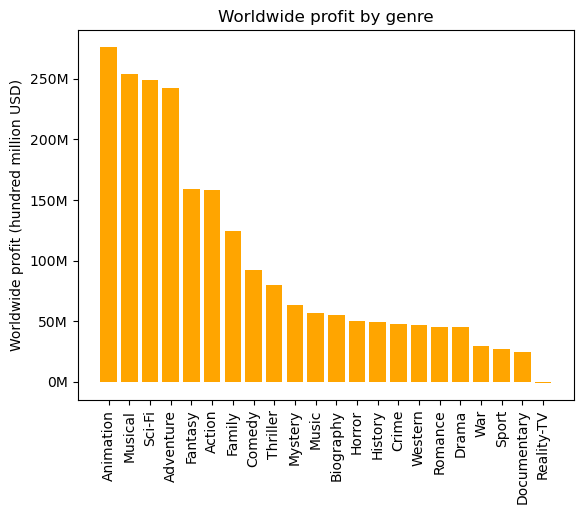

In [189]:
# plot on barcharts:
x = mean_profit_genre.index
y1 = mean_profit_genre['worldwide_profit']

fig, ax1 = plt.subplots()

# Bar chart
ax1.bar(x, y1, color='orange')
ax1.set_ylabel('Worldwide profit (hundred million USD)')

#format a-axis tick & label:
ax1.set_xticks(range(len(x)))
ax1.set_xticklabels(x, rotation=90)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000000,'1.0f')+'M'))

ax1.set_title('Worldwide profit by genre');

Top 4 genre by worldwide profit:

In [190]:
top4_genre_profit = mean_profit_genre.head(4)
top4_genre_profit.style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})

,id,production_budget,domestic_gross,worldwide_gross,release_month,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,start_year,runtime_minutes
each_genre,,,,,,,,,,,,,,
Animation,44.941176,"97,328,431.37","135,184,389.19","373,510,168.13",7.117647,"238,325,778.94","37,855,957.81","140,997,347.57","276,181,736.75",0.37,1.27,2.64,2014.215686,94.53
Musical,36.000000,"65,100,000.00","121,651,825.00","319,366,964.56",7.666667,"197,715,139.56","56,551,825.00","132,615,139.56","254,266,964.56",-0.03,0.96,1.93,2012.777778,115.11
Sci-Fi,49.798507,"93,820,671.64","125,058,209.60","342,937,799.17",6.664179,"217,879,589.57","31,237,537.96","124,058,917.93","249,117,127.53",0.54,1.07,2.61,2014.358209,114.31
Adventure,47.671388,"106,070,793.20","123,203,054.62","348,357,791.90",6.974504,"225,154,737.27","17,132,261.42","119,083,944.07","242,286,998.69",0.18,0.87,2.06,2014.291785,111.15


In [191]:
#List of top 4 genre list by worldwide profit:
top4_genre_list = list(top4_genre_profit.index)
top4_genre_list

['Animation', 'Musical', 'Sci-Fi', 'Adventure']

Filter dataframe including top 4 genres

In [192]:
top4_genre_df = movie_genres.loc[movie_genres['each_genre'].isin(top_4_genre_list)]
top4_genre_df.head().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",5,2011,Pirates of the Caribbean: On Stranger Tides2011,"804,600,000.00","-169,536,125.00","394,000,000.00","635,063,875.00",-0.41,0.96,1.55,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
4,3,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",6,2019,Dark Phoenix2019,"107,000,000.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,-0.57,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure
5,3,"Jun 7, 2019",Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",6,2019,Dark Phoenix2019,"107,000,000.00","-307,237,650.00","-243,000,000.00","-200,237,650.00",-0.88,-0.69,-0.57,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.00,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi
7,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",5,2015,Avengers: Age of Ultron2015,"944,008,095.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,3.24,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure
8,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",5,2015,Avengers: Age of Ultron2015,"944,008,095.00","128,405,868.00","613,408,095.00","1,072,413,963.00",0.39,1.86,3.24,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi


Indentify the mean, min, max of each financial metrics in top 4 genres:

In [72]:
top4_genre_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id,production_budget,domestic_gross,worldwide_gross,release_month,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,start_year,runtime_minutes
count,598.000000,598.00,598.00,598.00,598.000000,598.00,598.00,598.00,598.00,598.00,598.00,598.00,598.000000,594.00
mean,47.506689,"101,217,993.31","125,639,050.98","350,997,166.32",6.939799,"225,358,115.33","24,421,057.67","124,140,122.02","249,779,173.01",0.29,0.99,2.28,2014.270903,109.10
std,28.584515,"73,508,259.49","132,526,868.36","357,129,835.89",3.256698,"235,484,382.93","102,522,751.11","189,484,933.21","309,091,320.55",1.29,1.74,2.75,2.678819,18.93
min,1.000000,"70,000.00",0.00,0.00,1.000000,0.00,"-307,237,650.00","-243,000,000.00","-200,237,650.00",-1.00,-1.00,-1.00,2010.000000,60.00
25%,24.250000,"38,000,000.00","30,881,252.50","66,356,392.00",4.000000,"33,306,039.50","-24,903,049.25","-3,803,527.25","21,018,461.00",-0.50,-0.24,0.43,2012.000000,95.00
50%,46.000000,"90,000,000.00","83,295,507.00","245,526,487.00",7.000000,"155,055,544.00","-581,500.00","48,801,461.50","134,810,712.50",-0.05,0.62,1.67,2014.000000,105.00
75%,72.000000,"155,000,000.00","176,733,765.00","529,417,053.50",10.000000,"349,179,062.25","47,397,510.00","210,430,561.00","385,878,762.00",0.66,1.73,3.25,2016.000000,122.00
max,100.000000,"410,600,000.00","700,059,566.00","2,048,134,200.00",12.000000,"1,369,318,718.00","500,059,566.00","1,069,318,718.00","1,748,134,200.00",10.06,10.14,18.68,2020.000000,169.00


In [196]:
#Create intervals of production budget:
budget_interval = [0,20000000, 50000000, 100000000,200000000,300000000,400000000, float('inf')]
#Create a new column of production_budget intervals:
top4_genre_df.loc[:, 'budget_group']  = pd.cut(top4_genre_df.loc[:,'production_budget'], bins=budget_interval, labels=['<20M', '20M-50M', '50M-100M','100M-200M', '200M-300M','300M-400M','>400M'])

In [197]:
top4_genre_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre,budget_group
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,>400M
4,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,107000000.0,...,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,300M-400M
5,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,107000000.0,...,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,300M-400M
7,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,300M-400M
8,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,300M-400M


Use violin plot to find the correlation between worldwide ROI & production budget group:

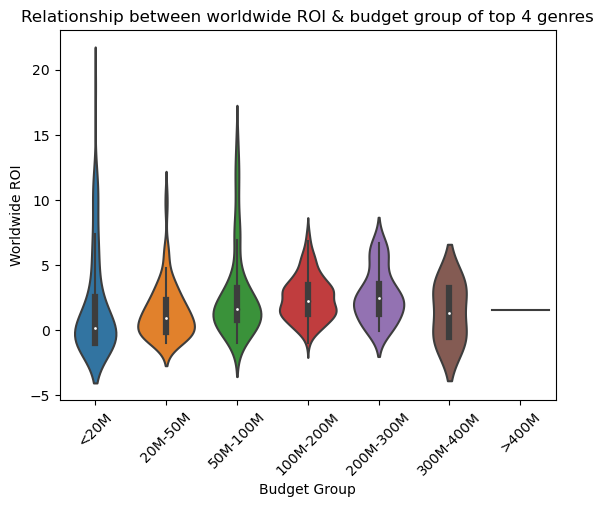

In [199]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = top4_genre_df)
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & budget group of top 4 genres')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

#### Investigate in each genre in terms of production budget:

##### Animation & production budget:

In [200]:
animation_budget_df = top4_genre_df[top4_genre_df['each_genre']=="Animation"]
animation_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre,budget_group
30,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,11,2010,Tangled2010,385655304.0,...,1.255682,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled2010,Animation,200M-300M
83,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,6,2018,Incredibles 22018,633938967.0,...,5.212604,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 22018,Animation,100M-200M
88,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,6,2016,Finding Dory2016,534919632.0,...,4.106076,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory2016,Animation,100M-200M
91,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,6,2010,Toy Story 32010,653874642.0,...,4.344398,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 32010,Animation,100M-200M
105,53,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08,6,2013,Monsters University2013,475100000.0,...,2.717942,tt1453405,Monsters University,Monsters University,2013,104.0,"Adventure,Animation,Comedy",Monsters University2013,Animation,100M-200M


In [201]:
animation_budget_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id,production_budget,domestic_gross,worldwide_gross,release_month,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,start_year,runtime_minutes
count,102.000000,102.00,102.00,102.00,102.000000,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.000000,101.00
mean,44.941176,"97,328,431.37","135,184,389.19","373,510,168.13",7.117647,"238,325,778.94","37,855,957.81","140,997,347.57","276,181,736.75",0.37,1.27,2.64,2014.215686,94.53
std,28.103001,"55,059,710.84","114,923,956.13","314,307,978.38",3.304045,"211,514,419.09","91,879,985.30","183,203,406.56","282,519,889.94",1.09,1.97,2.88,2.701769,8.27
min,1.000000,"1,500,000.00",0.00,0.00,1.000000,0.00,"-128,607,242.00","-131,843,000.00","-110,450,242.00",-1.00,-1.00,-1.00,2010.000000,63.00
25%,23.000000,"59,250,000.00","52,046,807.00","116,994,558.00",4.250000,"55,547,051.00","-15,567,846.75","1,309,213.25","49,076,309.25",-0.28,0.04,0.81,2012.000000,89.00
50%,43.500000,"83,500,000.00","109,795,867.50","310,836,599.50",7.000000,"195,193,870.00","16,832,458.00","73,825,059.00","194,139,928.50",0.12,0.77,1.98,2014.000000,95.00
75%,67.250000,"135,000,000.00","177,298,863.50","551,821,042.25",10.750000,"363,421,272.00","56,550,823.25","233,826,310.75","397,676,993.25",0.69,1.85,3.42,2016.000000,101.00
max,99.000000,"260,000,000.00","608,581,744.00","1,272,469,910.00",12.000000,"871,731,901.00","408,581,744.00","750,290,403.00","1,122,469,910.00",4.14,10.14,14.68,2020.000000,118.00


Use boxplot and violinplot to identify the correlation between animation budget group and worldwide ROI 

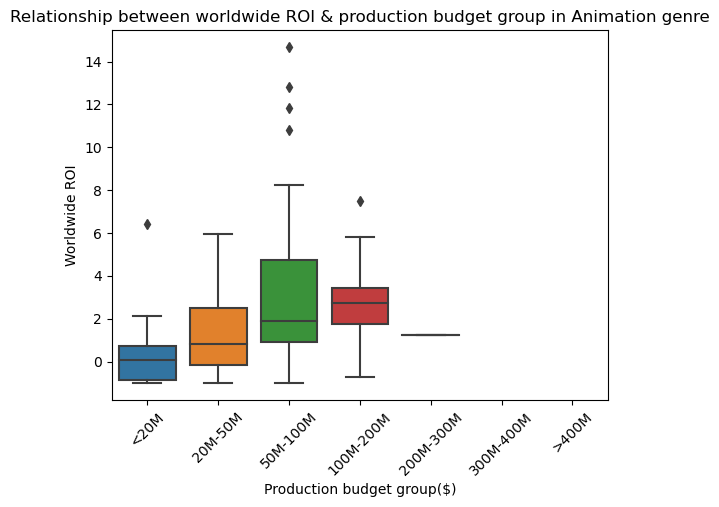

In [202]:
#Check production budget group vs worldwide_ROI
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = animation_budget_df, orient = 'v')
plt.xticks(rotation=45)
plt.xlabel('Production budget group($)')
plt.ylabel('Worldwide ROI')
plt.title('Relationship between worldwide ROI & production budget group in Animation genre')
plt.show()

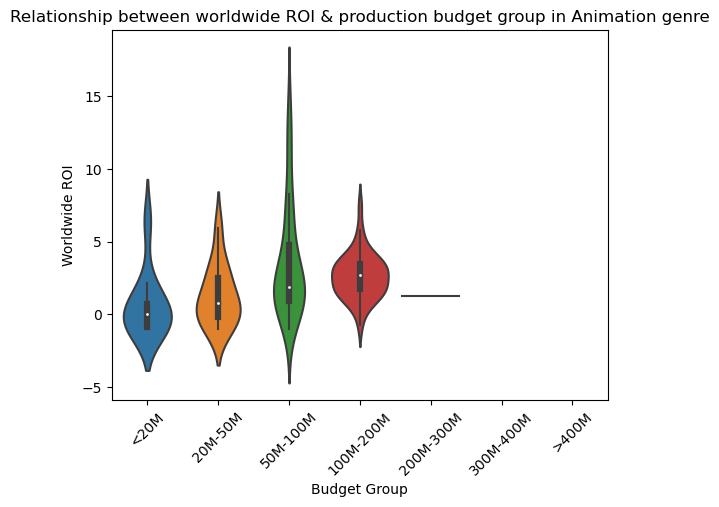

In [203]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = animation_budget_df)
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & production budget group in Animation genre')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

##### Musical & production budget:

In [204]:
musical_budget_df = top4_genre_df[top4_genre_df['each_genre']=="Musical"]
musical_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre,budget_group
100,51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,3,2010,Alice in Wonderland2010,691300000.0,...,4.127456,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical",Alice in Wonderland2010,Musical,100M-200M
278,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,3,2017,Beauty and the Beast2017,755185541.0,...,6.869998,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",Beauty and the Beast2017,Musical,100M-200M
767,25,"Dec 20, 2017",The Greatest Showman,84000000.0,174340174.0,3.866656e+08,12,2017,The Greatest Showman2017,212325376.0,...,3.603161,tt1485796,The Greatest Showman,The Greatest Showman,2017,105.0,"Biography,Drama,Musical",The Greatest Showman2017,Musical,50M-100M
889,29,"Jun 15, 2012",Rock of Ages,70000000.0,38518613.0,6.103193e+07,6,2012,Rock of Ages2012,22513319.0,...,-0.128115,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"Comedy,Drama,Musical",Rock of Ages2012,Musical,50M-100M
1111,24,"Nov 24, 2010",Burlesque,55000000.0,39440655.0,9.055268e+07,11,2010,Burlesque2010,51112020.0,...,0.646412,tt1126591,Burlesque,Burlesque,2010,119.0,"Drama,Music,Musical",Burlesque2010,Musical,50M-100M


In [205]:
musical_budget_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id,production_budget,domestic_gross,worldwide_gross,release_month,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,start_year,runtime_minutes
count,9.000000,9.00,9.00,9.00,9.000000,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.000000,9.00
mean,36.000000,"65,100,000.00","121,651,825.00","319,366,964.56",7.666667,"197,715,139.56","56,551,825.00","132,615,139.56","254,266,964.56",-0.03,0.96,1.93,2012.777778,115.11
std,19.868316,"72,924,755.74","182,335,595.54","485,190,328.53",3.674235,"305,530,227.04","120,941,730.76","239,168,375.43","418,718,353.92",1.10,2.21,3.03,2.773886,20.81
min,11.000000,"1,000,000.00",0.00,0.00,3.000000,0.00,"-31,481,387.00","-47,486,681.00","-8,968,068.00",-1.00,-1.00,-1.00,2010.000000,90.00
25%,24.000000,"5,600,000.00","531,806.00","531,806.00",5.000000,0.00,"-5,068,194.00","-3,887,980.00","-1,997,564.00",-0.91,-1.00,-0.91,2010.000000,105.00
50%,29.000000,"55,000,000.00","38,518,613.00","61,031,932.00",7.000000,"47,000,000.00","-1,997,564.00","-1,000,000.00","35,552,675.00",-0.45,-0.07,0.65,2012.000000,106.00
75%,51.000000,"84,000,000.00","174,340,174.00","386,665,550.00",11.000000,"212,325,376.00","90,340,174.00","128,325,376.00","302,665,550.00",0.67,2.46,4.13,2014.000000,123.00
max,74.000000,"200,000,000.00","504,014,165.00","1,259,199,706.00",12.000000,"755,185,541.00","344,014,165.00","595,185,541.00","1,099,199,706.00",2.15,4.66,6.87,2017.000000,160.00


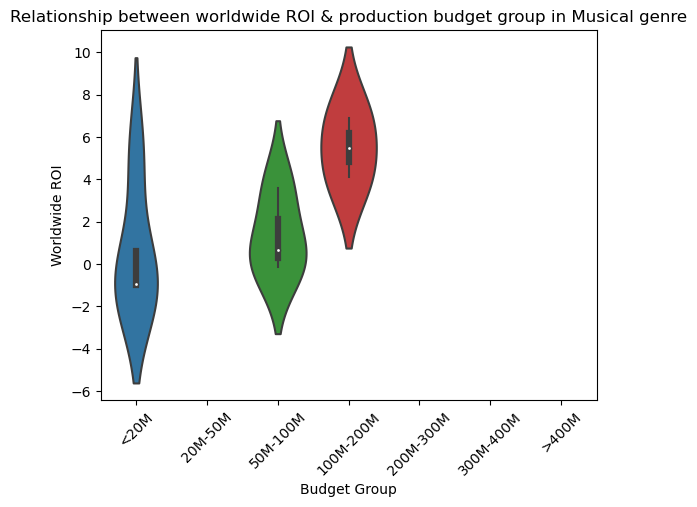

In [207]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = musical_budget_df)
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & production budget group in Musical genre')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

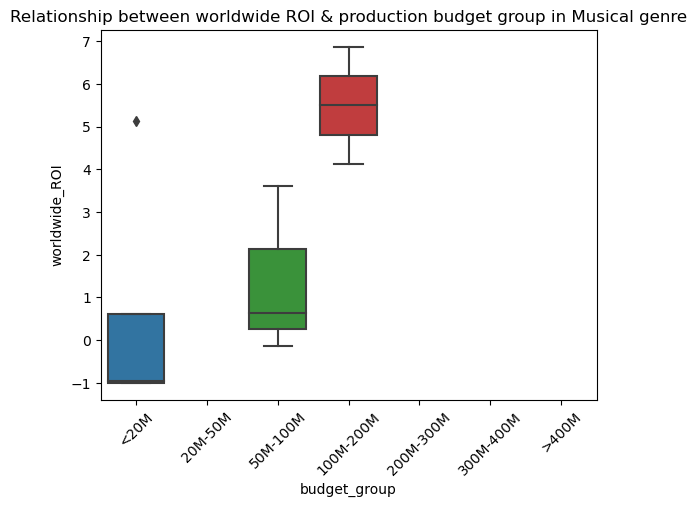

In [208]:
sns.boxplot(x = 'budget_group', y = 'worldwide_ROI' , 
            data = musical_budget_df, orient = 'v')
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & production budget group in Musical genre')
plt.show()


#### Sci-Fi & production budget:

In [209]:
scifi_budget_df = top4_genre_df[top4_genre_df['each_genre']=="Sci-Fi"]
scifi_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre,budget_group
5,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Sci-Fi,300M-400M
8,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,300M-400M
11,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi,200M-300M
28,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,3,2012,John Carter2012,2.097194e+08,...,0.028284,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter2012,Sci-Fi,200M-300M
34,17,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,5,2016,Captain America: Civil War2016,7.319851e+08,...,3.560278,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",Captain America: Civil War2016,Sci-Fi,200M-300M


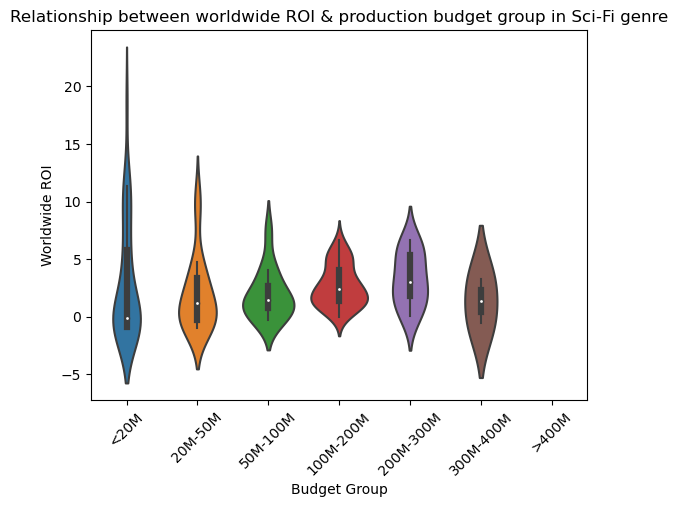

In [210]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = scifi_budget_df)
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & production budget group in Sci-Fi genre')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

#### Adventure & production budget:

In [211]:
adventure_budget_df = top4_genre_df[top4_genre_df['each_genre']=="Adventure"]
adventure_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,movie_year,international_gross,...,worldwide_ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title_year,each_genre,budget_group
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,>400M
4,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,6,2019,Dark Phoenix2019,1.070000e+08,...,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Dark Phoenix2019,Adventure,300M-400M
7,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,300M-400M
10,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure,200M-300M
13,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,1.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,Adventure,200M-300M


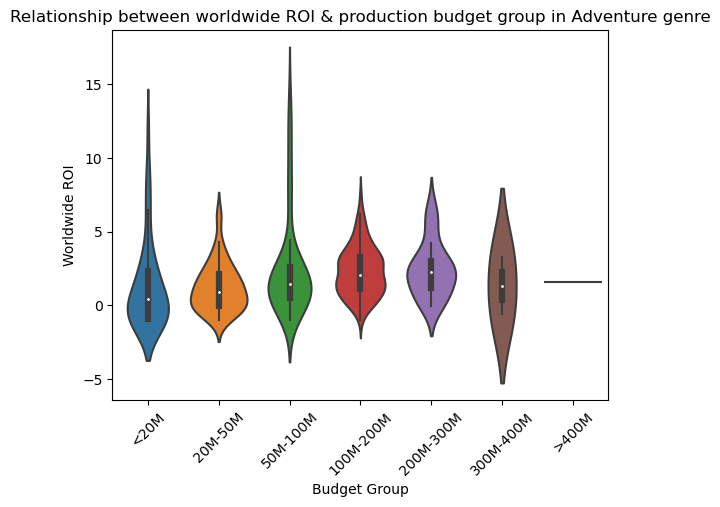

In [213]:
sns.violinplot(x = 'budget_group', y = 'worldwide_ROI', data = adventure_budget_df)
plt.xticks(rotation=45)
plt.title('Relationship between worldwide ROI & production budget group in Adventure genre')
plt.xlabel('Budget Group')
plt.ylabel('Worldwide ROI')
plt.show()

#### Merge table to get Popularity & financial metrics & genres

Merge 'tn_movie' & 'tmdb_movie' dataframes to get popularity and ROI

In [223]:
popularity_ROI = pd.merge(tn_movie,tmdb_movie, left_on = "movie_year", right_on = 'title_year', how = 'inner')
popularity_ROI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  1758 non-null   int64  
 1   release_date_x        1758 non-null   object 
 2   movie                 1758 non-null   object 
 3   production_budget     1758 non-null   float64
 4   domestic_gross        1758 non-null   float64
 5   worldwide_gross       1758 non-null   float64
 6   release_month_x       1758 non-null   int64  
 7   release_year_x        1758 non-null   object 
 8   movie_year            1758 non-null   object 
 9   international_gross   1758 non-null   float64
 10  domestic_profit       1758 non-null   float64
 11  international_profit  1758 non-null   float64
 12  worldwide_profit      1758 non-null   float64
 13  domestic_ROI          1758 non-null   float64
 14  international_ROI     1758 non-null   float64
 15  worldwide_ROI        

Merge 'popularity_ROI' & 'movie_basics_df' dataframes to get genres information

In [224]:
popularity_ROI_genres = pd.merge(popularity_ROI,movie_basics_df, left_on = "movie_year",right_on = 'title_year', how = 'inner')

In [116]:
popularity_ROI_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  1548 non-null   int64  
 1   release_date_x        1548 non-null   object 
 2   movie                 1548 non-null   object 
 3   production_budget     1548 non-null   float64
 4   domestic_gross        1548 non-null   float64
 5   worldwide_gross       1548 non-null   float64
 6   release_month_x       1548 non-null   int64  
 7   release_year_x        1548 non-null   object 
 8   movie_year            1548 non-null   object 
 9   international_gross   1548 non-null   float64
 10  domestic_profit       1548 non-null   float64
 11  international_profit  1548 non-null   float64
 12  worldwide_profit      1548 non-null   float64
 13  domestic_ROI          1548 non-null   float64
 14  international_ROI     1548 non-null   float64
 15  worldwide_ROI        

In [225]:
#Sort string in "genres" columns in anphabet order:
popularity_ROI_genres.loc[:, 'genres'] = popularity_ROI_genres['genres'].apply(lambda x: ', '.join(sorted(x.split(', '))) if x is not None else '')
popularity_ROI_genres.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_month_y,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,5,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,5,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,4,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,11,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,11,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017


In [226]:
#Copy "genres" column and create a new column called "each_genre"
popularity_ROI_genres.loc[:, 'each_genre'] = popularity_ROI_genres['genres'].copy()
popularity_ROI_genres.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,"Action,Adventure,Fantasy"
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,2017,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,"Action,Adventure,Fantasy"


In [227]:
popularity_ROI_genres.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})

,id_x,production_budget,domestic_gross,worldwide_gross,release_month_x,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,Unnamed: 0,id_y,popularity,vote_average,vote_count,release_month_y,start_year,runtime_minutes
count,1548.000000,"1,548.00","1,548.00","1,548.00",1548.000000,"1,548.00","1,548.00","1,548.00","1,548.00",1548.00,1548.00,1548.00,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,"1,533.00"
mean,50.669897,"46,847,305.98","60,173,133.68","150,916,334.94",7.523256,"90,743,201.25","13,325,827.71","43,895,895.28","104,069,028.96",0.92,0.93,2.85,11586.722868,203801.879845,12.980091,6.316150,2231.777132,7.347545,2013.910853,107.63
std,28.827870,"56,726,437.07","87,178,550.90","240,091,185.67",3.384837,"160,281,735.66","61,249,433.89","119,964,545.77","198,188,142.03",6.50,5.68,11.95,7615.947470,136299.606803,8.143378,0.939452,2933.760881,3.399781,2.476482,18.58
min,1.000000,"25,000.00",0.00,0.00,1.000000,0.00,"-201,941,321.00","-131,843,000.00","-110,450,242.00",-1.00,-1.00,-1.00,1.000000,189.000000,0.600000,0.800000,1.000000,1.000000,2010.000000,4.00
25%,26.000000,"10,000,000.00","5,342,828.00","10,864,515.50",5.000000,"2,671,338.00","-11,154,439.75","-9,181,643.25","-498,501.50",-0.66,-0.79,-0.15,5233.500000,70952.750000,8.258750,5.800000,328.000000,4.000000,2012.000000,95.00
50%,51.000000,"25,000,000.00","30,971,922.50","58,769,863.00",8.000000,"23,894,751.00","-72,500.00","-61,445.00","27,427,346.00",-0.03,-0.03,1.23,11165.500000,201846.000000,11.380500,6.300000,1105.000000,8.000000,2014.000000,106.00
75%,76.000000,"60,000,000.00","72,688,614.00","170,613,696.00",10.000000,"97,887,252.25","25,645,907.25","38,788,901.50","116,673,571.25",1.04,1.20,3.09,17571.250000,323372.750000,16.018750,6.900000,2879.250000,10.000000,2016.000000,118.00
max,100.000000,"410,600,000.00","700,059,566.00","2,048,134,200.00",12.000000,"1,369,318,718.00","500,059,566.00","1,069,318,718.00","1,748,134,200.00",226.64,187.92,415.56,24815.000000,532908.000000,80.773000,10.000000,22186.000000,12.000000,2018.000000,180.00


In [228]:
#Split "each_genre" row into multiple rows:
popularity_ROI_each_genre = popularity_ROI_genres.set_index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'release_month_x',
       'release_year_x', 'movie_year', 'international_gross',
       'domestic_profit', 'international_profit', 'worldwide_profit',
       'domestic_ROI', 'international_ROI', 'worldwide_ROI', 'Unnamed: 0',
       'genre_ids', 'id_y', 'original_language', 'original_title_x',
       'popularity', 'release_date_y', 'title', 'vote_average', 'vote_count',
       'release_month_y', 'release_year_y', 'title_year_x', 'movie_id',
       'primary_title', 'original_title_y', 'start_year', 'runtime_minutes',
       'genres', 'title_year_y']).apply(lambda x: x.str.split(',').explode()).reset_index()
popularity_ROI_each_genre.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Action
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,804600000.0,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Fantasy
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Action
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,944008095.0,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure


Filter 'popularity_ROI_each_genre' dataframe to get top 4 genres

In [229]:
top4_genre_list

['Animation', 'Musical', 'Sci-Fi', 'Adventure']

In [230]:
top4_popularity_df = popularity_ROI_each_genre[popularity_ROI_each_genre['each_genre'].isin(top4_genre_list)]

In [231]:
top4_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,release_year_y,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,2011,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure
5,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,2015,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi
7,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure
8,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,2018,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi


Create intervals of popularity:

In [233]:

interval_popularity = [0,10, 20, 30, 40, float('inf')]
top4_popularity_df.loc[:, 'popularity_group']  = pd.cut(top4_popularity_df['popularity'], bins=interval_popularity, labels=['<10','10-20', '20-30', '30-40','>40'])

In [234]:
top4_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,30-40
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,>40
5,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,>40
7,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure,>40
8,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi,>40


#### Top 4 genres: Worldwide revenue vs popularity group:

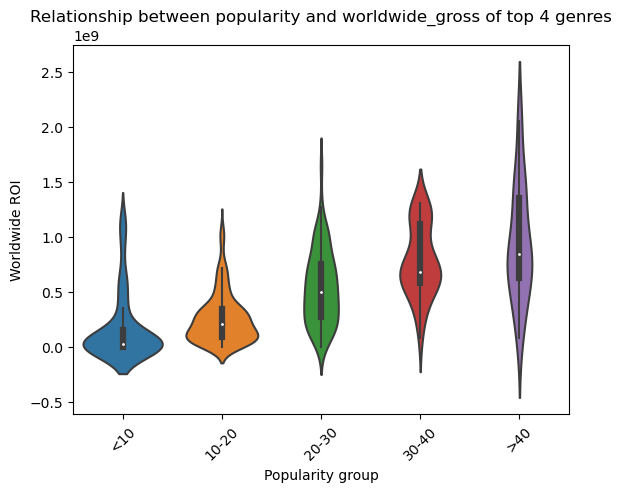

In [235]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = top4_popularity_df)
plt.xticks(rotation=45)
plt.title('Relationship between popularity and worldwide_gross of top 4 genres')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide ROI')
plt.show()

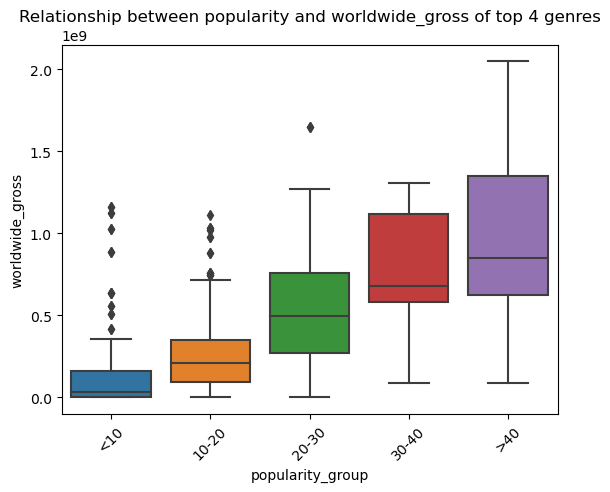

In [238]:
sns.boxplot(x = 'popularity_group', y = 'worldwide_gross' , 
            data = top4_popularity_df, orient = 'v')
plt.title('Relationship between popularity and worldwide_gross of top 4 genres')
plt.xticks(rotation=45)
plt.show()

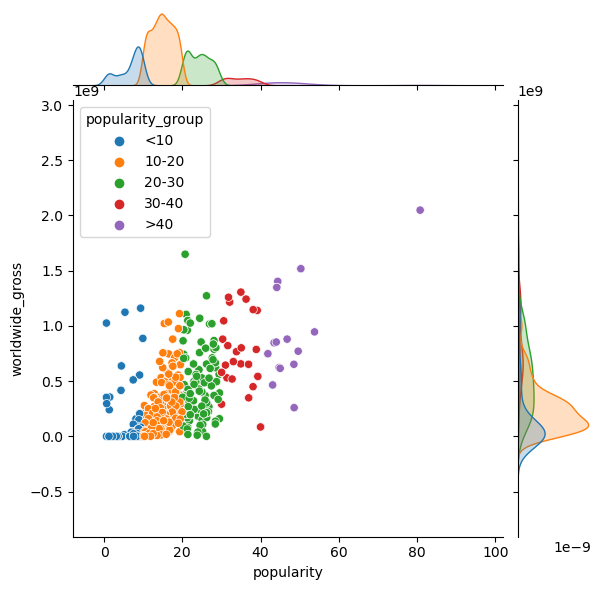

In [240]:
sns.jointplot(x = 'popularity', y = 'worldwide_gross', hue = 'popularity_group', data = top4_popularity_df)
plt.show()

Go into each genre in top 4 genres to find the relationship between worldwide revenue & popularity

#### Anination:  Worldwide ROI & popularity group

In [241]:
animation_popularity_df = top4_popularity_df[top4_popularity_df['each_genre']=="Animation"]
animation_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
33,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,11,2010,Tangled2010,385655304.0,...,Tangled2010,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",Tangled2010,Animation,20-30
86,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,6,2018,Incredibles 22018,633938967.0,...,Incredibles 22018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 22018,Animation,30-40
94,46,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,6,2016,Finding Dory2016,534919632.0,...,Finding Dory2016,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory2016,Animation,10-20
97,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,6,2010,Toy Story 32010,653874642.0,...,Toy Story 32010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Toy Story 32010,Animation,20-30
116,53,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08,6,2013,Monsters University2013,475100000.0,...,Monsters University2013,tt1453405,Monsters University,Monsters University,2013,104.0,"Adventure,Animation,Comedy",Monsters University2013,Animation,20-30


In [242]:
animation_popularity_df.describe().style.format({'runtime_minutes': '{:,.2f}','production_budget': '{:,.2f}','domestic_gross': '{:,.2f}', 'worldwide_gross': '{:,.2f}', 'international_gross': '{:,.2f}',
       'domestic_profit': '{:,.2f}','international_profit': '{:,.2f}','worldwide_profit': '{:,.2f}','domestic_ROI': '{:.2f}','international_ROI': '{:.2f}', 'worldwide_ROI': '{:.2f}'})
 

,id_x,production_budget,domestic_gross,worldwide_gross,release_month_x,international_gross,domestic_profit,international_profit,worldwide_profit,domestic_ROI,international_ROI,worldwide_ROI,Unnamed: 0,id_y,popularity,vote_average,vote_count,release_month_y,start_year,runtime_minutes
count,104.000000,104.00,104.00,104.00,104.000000,104.00,104.00,104.00,104.00,104.00,104.00,104.00,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.00
mean,43.711538,"100,836,538.46","143,409,037.04","395,529,720.53",7.634615,"252,120,683.49","42,572,498.58","151,284,145.03","294,693,182.07",0.42,1.36,2.78,12246.615385,186767.096154,15.899144,6.497115,3142.096154,7.471154,2014.144231,95.19
std,28.187539,"56,348,966.54","113,081,544.38","309,559,587.41",3.309468,"209,159,957.77","91,119,348.78","180,767,831.26","277,662,300.38",1.08,1.94,2.83,7686.980556,124138.986570,6.974645,0.962143,2989.785986,3.364454,2.470872,8.35
min,1.000000,"1,500,000.00",0.00,0.00,1.000000,0.00,"-128,607,242.00","-131,843,000.00","-110,450,242.00",-1.00,-1.00,-1.00,1.000000,10191.000000,0.600000,0.800000,2.000000,1.000000,2010.000000,63.00
25%,20.000000,"60,000,000.00","62,825,238.25","140,937,370.50",5.750000,"76,293,127.50","-10,919,432.00","14,165,752.00","82,612,686.50",-0.24,0.16,0.93,5215.500000,73808.750000,11.344000,5.975000,883.500000,5.000000,2012.000000,90.00
50%,42.500000,"92,500,000.00","123,282,363.50","338,960,585.50",8.000000,"205,437,550.00","22,531,518.50","79,536,592.50","219,150,134.00",0.20,0.85,2.00,13360.000000,171536.000000,15.275000,6.600000,1880.000000,7.000000,2014.000000,95.00
75%,63.750000,"145,000,000.00","193,793,640.25","566,079,098.50",11.000000,"376,966,718.25","63,793,309.25","251,650,000.00","455,831,982.75",0.70,2.04,3.48,17739.750000,281433.000000,18.934500,7.025000,4305.750000,11.000000,2016.000000,101.25
max,99.000000,"260,000,000.00","608,581,744.00","1,272,469,910.00",12.000000,"871,731,901.00","408,581,744.00","750,290,403.00","1,122,469,910.00",4.14,10.14,14.68,24573.000000,446894.000000,36.920000,8.200000,12691.000000,12.000000,2018.000000,118.00


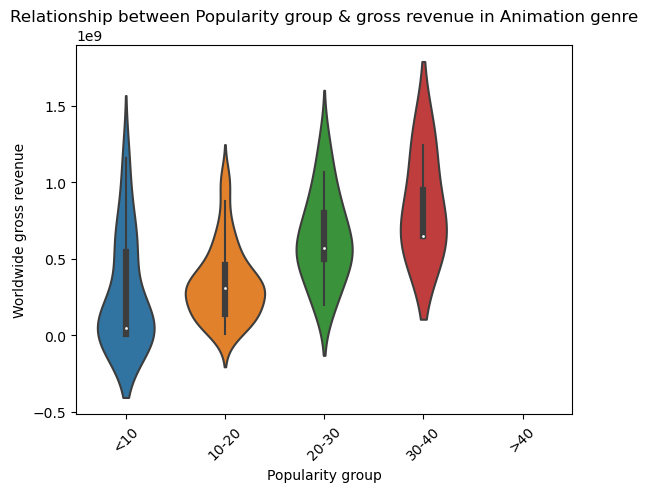

In [142]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = animation_popularity_df)
plt.xticks(rotation=45)
plt.title('Relationship between Popularity group & gross revenue in Animation genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.show()

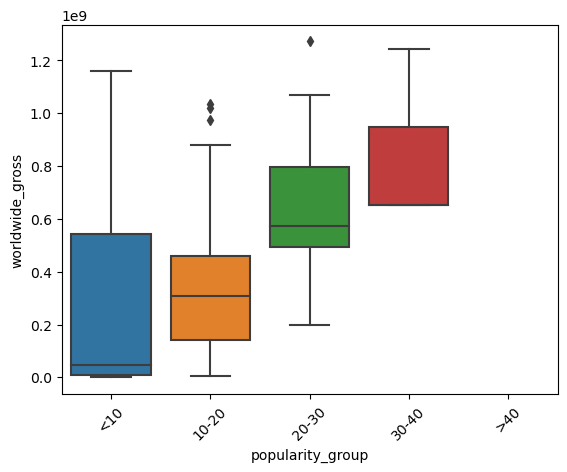

In [243]:
sns.boxplot(x = 'popularity_group', y = 'worldwide_gross' , 
            data = animation_popularity_df, orient = 'v')

plt.title('Relationship between Popularity group & gross revenue in Animation genre')
plt.xticks(rotation=45)
plt.title('')
plt.show()


#### Musical:  Worldwide ROI & popularity group

In [244]:
musical_popularity_df = top4_popularity_df[top4_popularity_df['each_genre']=="Musical"]
musical_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
106,51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,3,2010,Alice in Wonderland2010,691300000.0,...,Alice in Wonderland2010,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical",Alice in Wonderland2010,Musical,20-30
111,51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,3,2010,Alice in Wonderland2010,691300000.0,...,Alice in Wonderland2010,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical",Alice in Wonderland2010,Musical,<10
296,35,"Mar 17, 2017",Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,3,2017,Beauty and the Beast2017,755185541.0,...,Beauty and the Beast2017,tt2771200,Beauty and the Beast,Beauty and the Beast,2017,129.0,"Family,Fantasy,Musical",Beauty and the Beast2017,Musical,30-40
821,25,"Dec 20, 2017",The Greatest Showman,84000000.0,174340174.0,3.866656e+08,12,2017,The Greatest Showman2017,212325376.0,...,The Greatest Showman2017,tt1485796,The Greatest Showman,The Greatest Showman,2017,105.0,"Biography,Drama,Musical",The Greatest Showman2017,Musical,20-30
824,25,"Dec 20, 2017",The Greatest Showman,84000000.0,174340174.0,3.866656e+08,12,2017,The Greatest Showman2017,212325376.0,...,The Greatest Showman2017,tt1485796,The Greatest Showman,The Greatest Showman,2017,105.0,"Biography,Drama,Musical",The Greatest Showman2017,Musical,20-30


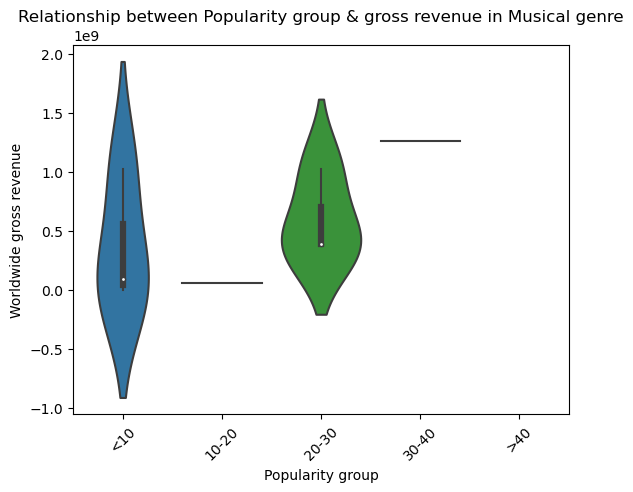

In [245]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = musical_popularity_df)
plt.xticks(rotation=45)
plt.title('Relationship between Popularity group & gross revenue in Musical genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.show()

#### Sci-Fi:  Worldwide ROI & popularity group

In [246]:
scifi_popularity_df = top4_popularity_df[top4_popularity_df['each_genre']=="Sci-Fi"]
scifi_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
5,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Sci-Fi,>40
8,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Sci-Fi,>40
31,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,3,2012,John Carter2012,2.097194e+08,...,John Carter2012,tt0401729,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",John Carter2012,Sci-Fi,10-20
37,17,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,5,2016,Captain America: Civil War2016,7.319851e+08,...,Captain America: Civil War2016,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",Captain America: Civil War2016,Sci-Fi,30-40
56,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,5,2012,The Avengers2012,8.946564e+08,...,The Avengers2012,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",The Avengers2012,Sci-Fi,>40


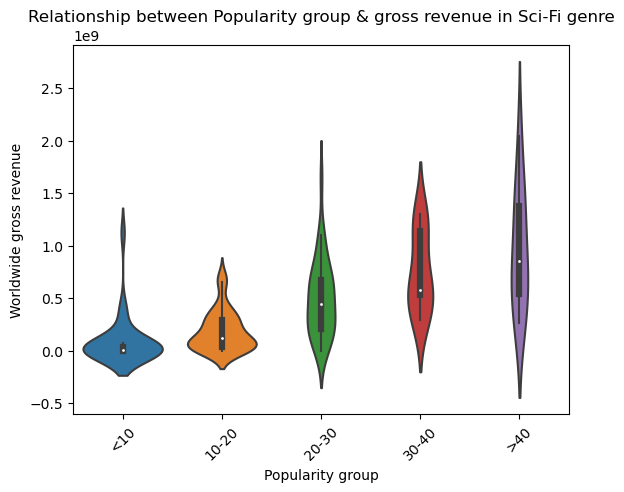

In [247]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = scifi_popularity_df)
plt.xticks(rotation=45)
plt.title('Relationship between Popularity group & gross revenue in Sci-Fi genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.show()

#### Adventure:  Worldwide ROI & popularity group

In [248]:
adventure_popularity_df = top4_popularity_df[top4_popularity_df['each_genre']=="Adventure"]
adventure_popularity_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_month_x,release_year_x,movie_year,international_gross,...,title_year_x,movie_id,primary_title,original_title_y,start_year,runtime_minutes,genres,title_year_y,each_genre,popularity_group
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,5,2011,Pirates of the Caribbean: On Stranger Tides2011,8.046000e+08,...,Pirates of the Caribbean: On Stranger Tides2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides2011,Adventure,30-40
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,5,2015,Avengers: Age of Ultron2015,9.440081e+08,...,Avengers: Age of Ultron2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron2015,Adventure,>40
7,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,4,2018,Avengers: Infinity War2018,1.369319e+09,...,Avengers: Infinity War2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War2018,Adventure,>40
10,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,Adventure,30-40
13,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,11,2017,Justice League2017,4.269209e+08,...,Justice League2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League2017,Adventure,30-40


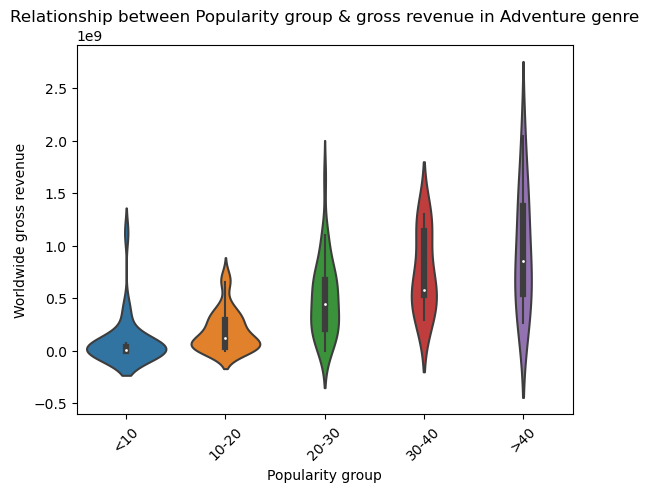

In [154]:
sns.violinplot(x = 'popularity_group', y = 'worldwide_gross', data = scifi_popularity_df)
plt.xticks(rotation=45)
plt.title('Relationship between Popularity group & gross revenue in Adventure genre')
plt.xlabel('Popularity group')
plt.ylabel('Worldwide gross revenue')
plt.show()